In [1]:
import pickle
planets, resonances, threebodyresonances, outputs = pickle.load(open("outputs.pickle", "rb"))
t, e, P, Pratio, phi1, phi2, deltapomega, phi3body = outputs

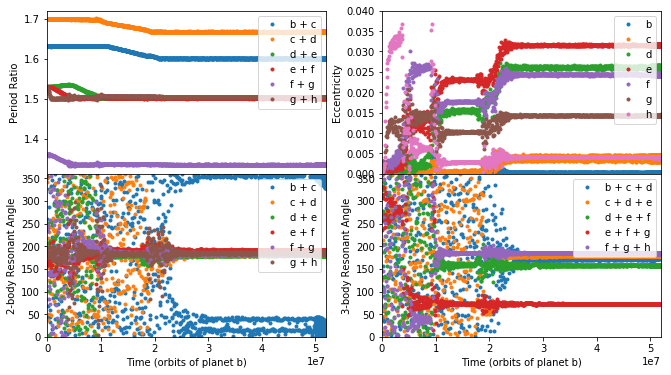

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('paper')
fig, axarr = plt.subplots(ncols=2, nrows=2, figsize=(11,6), sharex=True)
axarr[0,1].set_xlim([t['b'][0],t['b'][-1]])

for p in planets:
    axarr[0,1].plot(t[p], e[p], '.', label=p, rasterized=True)
    axarr[0,1].set_ylabel("Eccentricity")
    axarr[0,1].set_ylim([0.,0.04])
for resonance in resonances.items():
    pair = resonance[0]
    res = resonance[1]
    axarr[0,0].plot(t[pair], Pratio[pair], '.', label=pair[0]+" + "+pair[1], rasterized=True)
    axarr[0,0].set_ylabel("Period Ratio")
    if res is not None:
        axarr[1,0].plot(t[pair], phi1[pair], '.', label=pair[0]+" + "+pair[1], rasterized=True)
        axarr[1,0].set_ylabel("2-body Resonant Angle")
        axarr[1,0].set_ylim([0.,360])
for resonance in threebodyresonances.items():
    triad = resonance[0]
    axarr[1,1].plot(t[triad], phi3body[triad], '.', label=triad[0]+ " + "+triad[1] + " + "+triad[2], rasterized=True)
    axarr[1,1].set_ylabel("3-body Resonant Angle")
    axarr[1,1].set_ylim([0.,360])
for ax in axarr.flatten():
    ax.legend(loc='upper right')
fig.subplots_adjust(hspace=0)

axarr[1,0].set_xlabel("Time (orbits of planet b)")
axarr[1,1].set_xlabel("Time (orbits of planet b)")
fig.savefig("fig1.pdf", bbox_inches='tight')